<a href="https://colab.research.google.com/github/AlejandroSepulvedaGuatecique/Projects-in-Ml-and-AI-/blob/main/HW2/HW2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import time

In [102]:
# data source: https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction
# note: we have combined Training and Testing data from Kaggle into a single data frame
df = pd.read_csv('https://raw.githubusercontent.com/AlejandroSepulvedaGuatecique/Projects-in-Ml-and-AI-/main/HW1/Heart_Disease_Prediction.csv')
df.columns = [c.replace(' ', '_') for c in df.columns] #Some columns names have spaces, here spaces are replaced by '_'
mapping = {'Presence': 1, 'Absence': 0}
df = df.replace({'Heart_Disease': mapping})

y = df['Heart_Disease']
X = df[['Age', 'Sex', 'Chest_pain_type', 'BP', 'Cholesterol', 'FBS_over_120',
        'EKG_results', 'Max_HR', 'Exercise_angina', 'ST_depression',
        'Slope_of_ST', 'Number_of_vessels_fluro', 'Thallium']]

m = len(y)
n = np.size(X,1)
X = np.hstack((np.ones((m,1)),X))
#y = y[:,np.newaxis]

# TASK 1
Implement a Decision Tree Classifier for your classification problem. You may use a built-in package to implement your classifier. Try modifying one or more of the input parameters and describe what changes you notice in your results. Clearly describe how these factors are affecting your output

## Implementation of Decision Tree Classifier

Herein a decission tree classifier is implemented using the DecisionTreeClassifier built-in package from Scikit Learn. 

In the following codes the effect of the maximum depth criteria to measure the quality of a split is compared and analyzed, finally the best model is chosen. All the models were assessed with cross validation.  

In [108]:
# import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2, test_size=0.1)
target_names = ['Abscense', 'Presence']
X = X_train
y = y_train

## Effect of Maximum depth for decission tree classifier

Here, 30 decission tree classifier are fitted to the data. The first tree has a max depth equal to 1, while the second tree has a max depth equal to 2, and so on, until the last decission tree with a max depth equal to 30. 

In [109]:
# Fitting first decission tree classifier 
loop=31
mean_recall = np.zeros(loop-1)
mean_f1 = np.zeros(loop-1)
for maxdepth in np.arange(1,loop,1):
      dtree = DecisionTreeClassifier(criterion='entropy',max_depth=maxdepth)
      #dtree.fit(X_train,y_train)
      #predictions = dtree.predict(X_test)
      #print('Max depth =', dtree.tree_.max_depth)  
      #print('The number of nodes (internal nodes + leaves) in the tree =', dtree.tree_.node_count)  
      #print('confusion matrix= \n',confusion_matrix(y_test, predictions))
      #print(classification_report(y_test, predictions, target_names=target_names))

      # Testing the decission tree classifier with the test set

      cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
      n_scores = cross_val_score(dtree, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
      mean_recall[maxdepth-1] = np.mean(n_scores)
      print('Max depth = %.3f : The average recall score is %.3f with an associated standard deviation equal to %.3f' % (maxdepth, np.mean(n_scores), np.std(n_scores)))
      n_scores = cross_val_score(dtree, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
      mean_f1[maxdepth-1] = np.mean(n_scores)
      #print(n_scores)
      print('Max depth = %.3f : The average f1 score is %.3f with an associated standard deviation equal to %.3f' % (maxdepth, np.mean(n_scores), np.std(n_scores)))


Max depth = 1.000 : The average recall score is 0.683 with an associated standard deviation equal to 0.067
Max depth = 1.000 : The average f1 score is 0.690 with an associated standard deviation equal to 0.049
Max depth = 2.000 : The average recall score is 0.584 with an associated standard deviation equal to 0.120
Max depth = 2.000 : The average f1 score is 0.662 with an associated standard deviation equal to 0.069
Max depth = 3.000 : The average recall score is 0.727 with an associated standard deviation equal to 0.119
Max depth = 3.000 : The average f1 score is 0.762 with an associated standard deviation equal to 0.075
Max depth = 4.000 : The average recall score is 0.654 with an associated standard deviation equal to 0.093
Max depth = 4.000 : The average f1 score is 0.725 with an associated standard deviation equal to 0.067
Max depth = 5.000 : The average recall score is 0.721 with an associated standard deviation equal to 0.093
Max depth = 5.000 : The average f1 score is 0.727 wit

The models are validated using k-cross validation with a k equal to 5. Also the models are assessed based on the f1 score and recall metrics. The following figure shows the obtained results. 

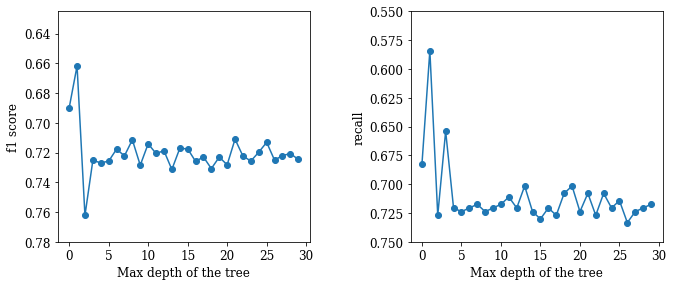

In [110]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
fig.subplots_adjust(wspace=0.4,hspace=0,left=0.2, right=0.9, top=0.9, bottom=0.1)
fontdict={  'fontsize': 12, 'fontname': 'serif'}
axes[0].plot(mean_f1,'-o')
axes[0].set_xlabel('Max depth of the tree',fontdict)
axes[0].set_ylabel('f1 score',fontdict)
axes[0].set_ylim(0.78, 0.625)

axes[1].plot(mean_recall,'-o')
axes[1].set_xlabel('Max depth of the tree',fontdict)
axes[1].set_ylabel('recall',fontdict)
axes[1].set_ylim(0.75, 0.55)


for tick in axes[0].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[0].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

for tick in axes[1].get_xticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)
for tick in axes[1].get_yticklabels():
        tick.set_fontname("serif")
        tick.set_fontsize(12)

Note that the figures have the y axis inversed. For a maximum depth equal to 1 were not optimal the f1 score was close to 0.69. This is a sign that the model may be underfitting the data. The optimal metric values were found at a maximum depth equal to 3 (f1=0.75, recall=0.74). After a maximum depth equal to 3 the f1 metric started to decrease again, suggesting an overfitting issue. With respect to the recall metric, small values are found at maximum depths equal to 1 and 2, suggesting an underfitting case. For max depth equal 3 a relatively large value is found, when the depth is increased, the metric does not increase, it remains close to the value obtained at max depth equal to 3. Therefore, the selected maximum depth value for this particular problem is 3.

## Effect of criterion

Let's see the effect of the function to measure the quality of a split. In the following codes the Gini and entropy criterion are used and the obtained results are compared

In [111]:
# Using entropy criterion
maxdepth=3
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=3)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(dtree, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
mean_recall= np.mean(n_scores)
print('Max depth = %.3f : The average recall score is %.3f with an associated standard deviation equal to %.3f' % (maxdepth, np.mean(n_scores), np.std(n_scores)))
n_scores = cross_val_score(dtree, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
mean_f1= np.mean(n_scores)
#print(n_scores)
print('Max depth = %.3f : The average f1 score is %.3f with an associated standard deviation equal to %.3f' % (maxdepth, np.mean(n_scores), np.std(n_scores)))

Max depth = 3.000 : The average recall score is 0.724 with an associated standard deviation equal to 0.118
Max depth = 3.000 : The average f1 score is 0.762 with an associated standard deviation equal to 0.075


In [112]:
# Fitting first decission tree classifier
maxdepth=3
dtree = DecisionTreeClassifier(criterion='gini',max_depth=3)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(dtree, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
mean_recall= np.mean(n_scores)
print('Max depth = %.3f : The average recall score is %.3f with an associated standard deviation equal to %.3f' % (maxdepth, np.mean(n_scores), np.std(n_scores)))
n_scores = cross_val_score(dtree, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
mean_f1= np.mean(n_scores)
#print(n_scores)
print('Max depth = %.3f : The average f1 score is %.3f with an associated standard deviation equal to %.3f' % (maxdepth, np.mean(n_scores), np.std(n_scores)))

Max depth = 3.000 : The average recall score is 0.752 with an associated standard deviation equal to 0.113
Max depth = 3.000 : The average f1 score is 0.769 with an associated standard deviation equal to 0.065


Criterion: Entropy --> recall score is 0.724,  f1 score is 0.762
Criterion: Gini --> recall score is 0.752,  f1 score is 0.769

The f1 score obtained with both criteria are practically the same. However, the gini criterion leads to a higher recall score. 

The model with a gini criterion and a max depth equal to 3 is selected.

## Bagging ensemble method

Here the Random Forest Classifier method is used. 

In [114]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(rfc, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
print('The average recall score is %.3f with an associated standard deviation equal to %.3f' % (np.mean(n_scores), np.std(n_scores)))
n_scores = cross_val_score(dtree, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
mean_f1= np.mean(n_scores)
print('The average f1 score is %.3f with an associated standard deviation equal to %.3f' % (np.mean(n_scores), np.std(n_scores)))

Max depth = 3.000 : The average recall score is 0.771 with an associated standard deviation equal to 0.084
Max depth = 3.000 : The average f1 score is 0.769 with an associated standard deviation equal to 0.064


In [118]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,criterion='entropy')
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(rfc, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
print('The average recall score is %.3f with an associated standard deviation equal to %.3f' % (np.mean(n_scores), np.std(n_scores)))
n_scores = cross_val_score(dtree, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
mean_f1= np.mean(n_scores)
print('The average f1 score is %.3f with an associated standard deviation equal to %.3f' % (np.mean(n_scores), np.std(n_scores)))

The average recall score is 0.771 with an associated standard deviation equal to 0.086
The average f1 score is 0.770 with an associated standard deviation equal to 0.063


## Boosting ensemble method

Here the AdaBoostClassifier method is implemented

In [116]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

clf = AdaBoostClassifier(n_estimators=4, random_state=0, algorithm='SAMME')
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(clf, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
print('The average recall score is %.3f with an associated standard deviation equal to %.3f' % (np.mean(n_scores), np.std(n_scores)))
n_scores = cross_val_score(dtree, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
mean_f1= np.mean(n_scores)
print('The average f1 score is %.3f with an associated standard deviation equal to %.3f' % (np.mean(n_scores), np.std(n_scores)))

The average recall score is 0.810 with an associated standard deviation equal to 0.070
The average f1 score is 0.771 with an associated standard deviation equal to 0.065


In [126]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

clf = AdaBoostClassifier(n_estimators=4, learning_rate=10, random_state=0, algorithm='SAMME')
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(clf, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
print('The average recall score is %.3f with an associated standard deviation equal to %.3f' % (np.mean(n_scores), np.std(n_scores)))
n_scores = cross_val_score(dtree, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
mean_f1= np.mean(n_scores)
print('The average f1 score is %.3f with an associated standard deviation equal to %.3f' % (np.mean(n_scores), np.std(n_scores)))

The average recall score is 0.692 with an associated standard deviation equal to 0.085
The average f1 score is 0.772 with an associated standard deviation equal to 0.064


In [ ]:
A = classification_report(y_test, predictions, target_names=target_names)

print(A[1:168])

help(dtree.tree_)

[0.8        0.84615385 0.69565217 0.93617021 0.73469388 0.79166667
 0.89795918 0.68181818 0.7826087  0.80851064 0.7826087  0.66666667
 0.60465116 0.89795918 0.68292683]
Accuracy: 0.774 (0.093)
